In [76]:
from warnings import filterwarnings
filterwarnings(action="ignore")

import numpy as np
import pandas as pd
from scipy import stats

from io import StringIO

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import callbacks
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import optimizers, activations, losses, regularizers

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv").drop("total_fare", axis="columns")

print(train.shape, test.shape)

train.head()

(209673, 8) (89861, 7)


,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [3]:
test.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,1076.0,4.18,1.0,0,0,13.500,0
1,429.0,1.48,4.0,0,0,13.500,0
2,856.0,4.15,1.0,0,24,6.000,0
3,622.0,3.22,1.0,0,15,5.625,0
4,507.0,3.98,1.0,0,0,2.250,0


In [4]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
trip_duration,89861.0,1148.178164,4611.480867,0.00,446.00,705.00,1094.00,86395.0
distance_traveled,89861.0,7.263529,554.965869,0.02,1.95,3.20,5.73,145517.6
num_of_passengers,89861.0,1.286732,0.920910,0.00,1.00,1.00,1.00,9.0
fare,89861.0,0.000000,0.000000,0.00,0.00,0.00,0.00,0.0
tip,89861.0,13.031048,18.692751,0.00,0.00,9.00,20.00,719.0
miscellaneous_fees,89861.0,15.190636,12.677904,-0.50,6.00,9.75,26.45,431.5
surge_applied,89861.0,0.282280,0.450112,0.00,0.00,0.00,1.00,1.0


In [5]:
train[train["total_fare"] < 1]

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
2385,82.0,0.16,1.0,0.0,0,0.0,0.0,0
2389,588.0,2.41,1.0,0.0,0,0.0,0.0,0
6706,1330.0,5.15,1.0,0.0,0,0.0,0.0,0
7467,3669.0,8.37,3.0,0.0,0,0.0,0.0,0
7906,3688.0,22.85,1.0,0.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
196978,38.0,0.64,1.0,0.0,0,0.0,0.0,0
201515,3796.0,17.70,1.0,0.0,0,0.0,0.0,0
201900,5259.0,39.75,2.0,0.0,0,0.0,0.0,0
204870,27.0,0.16,1.0,0.0,0,0.0,0.0,0


In [6]:
train = train.reindex(
            ["trip_duration", "distance_traveled",
             "num_of_passengers", "fare", "tip", "miscellaneous_fees",
             "surge_applied", "total_fare"],
             axis=1)

In [7]:
disp = StringIO()
train.info(buf=disp)
print(disp.getvalue())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   surge_applied       209673 non-null  int64  
 7   total_fare          209673 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 12.8 MB



In [8]:
train.describe().T.style.background_gradient(cmap="coolwarm")

,count,mean,std,min,25%,50%,75%,max
trip_duration,209673.000000,1173.181478,4775.653621,0.000000,446.000000,707.000000,1098.000000,86387.000000
distance_traveled,209673.000000,5.054431,125.217419,0.020000,1.950000,3.200000,5.730000,57283.910000
num_of_passengers,209673.000000,1.292808,0.930754,0.000000,1.000000,1.000000,1.000000,9.000000
fare,209673.000000,99.623431,85.602702,0.000000,52.500000,75.000000,116.250000,4466.250000
tip,209673.000000,13.030824,20.367764,0.000000,0.000000,9.000000,20.000000,2500.000000
miscellaneous_fees,209673.000000,15.136829,12.553436,-0.500000,6.000000,9.750000,26.450000,435.000000
surge_applied,209673.000000,0.280523,0.449256,0.000000,0.000000,0.000000,1.000000,1.000000
total_fare,209673.000000,127.791084,98.797374,0.000000,70.200000,101.700000,152.250000,4472.250000


In [9]:
train.nunique()

trip_duration         5907
distance_traveled     2463
num_of_passengers       10
fare                   631
tip                    262
miscellaneous_fees    1674
surge_applied            2
total_fare            3742
dtype: int64

In [10]:
train.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
surge_applied         0
total_fare            0
dtype: int64

In [11]:
train["trip_duration"] = train["trip_duration"]/3600

## EDA

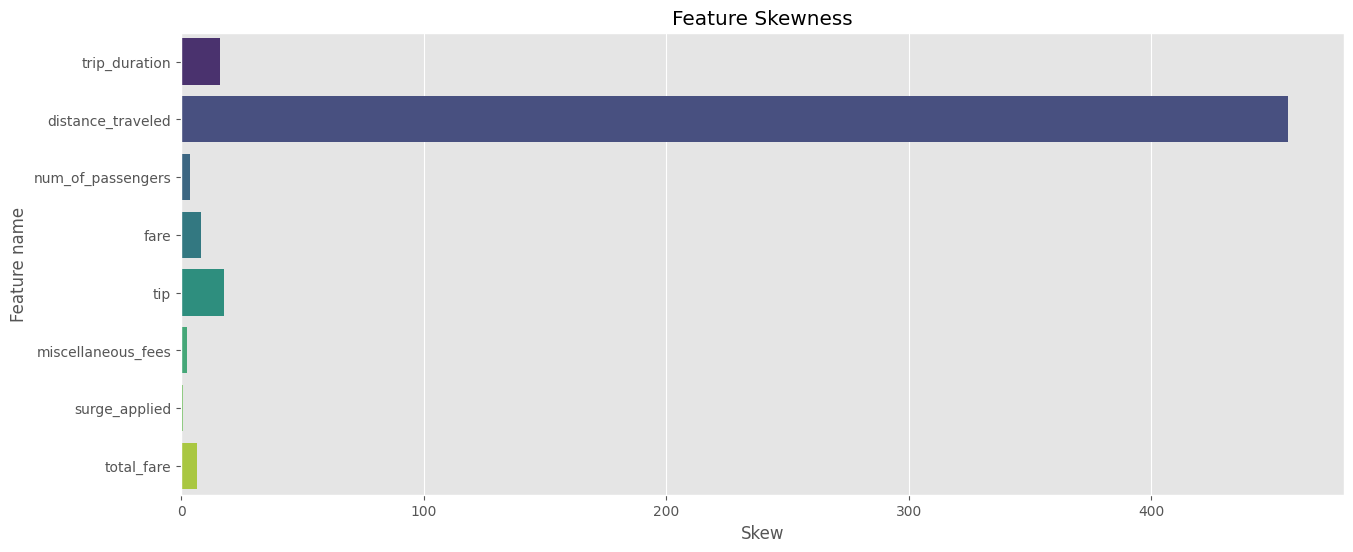

In [12]:
plt.figure(figsize=(15, 6))
sns.barplot(x=train.skew(), y=train.skew().index, palette="viridis")
plt.xlabel("Skew")
plt.ylabel("Feature name")
plt.title("Feature Skewness")
plt.show()

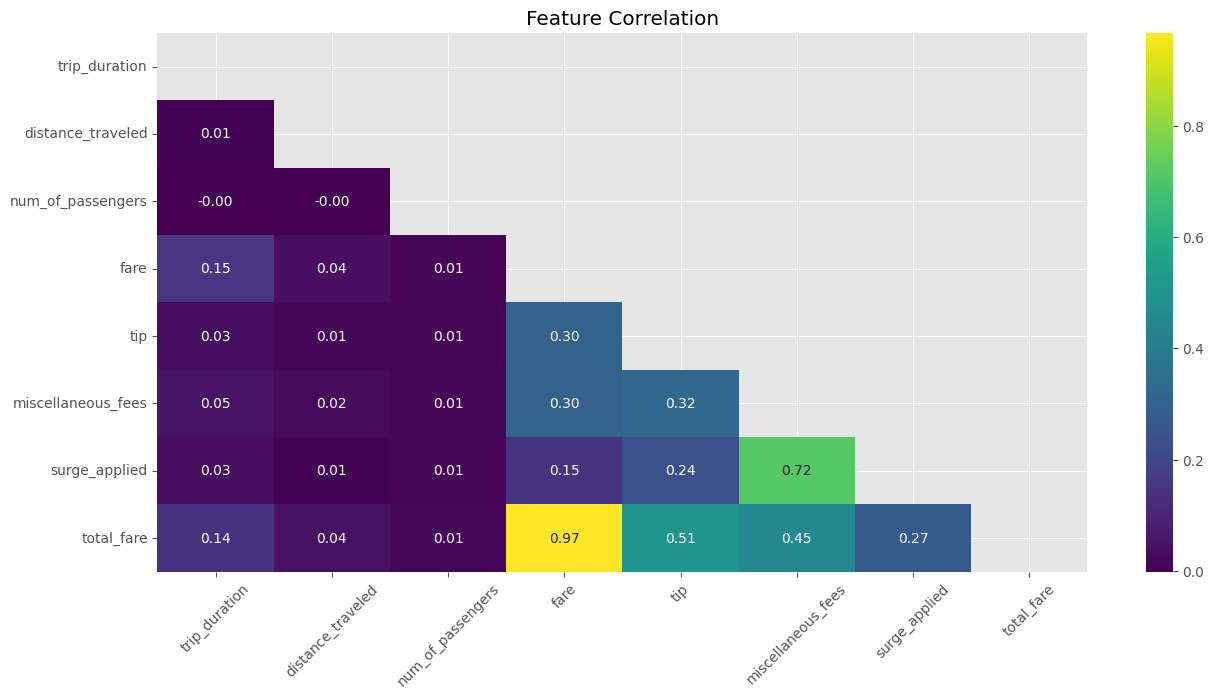

In [13]:
plt.figure(figsize=(15, 7))
sns.heatmap(train.corr(),
            annot=True,
            fmt=".2f",
            mask=np.triu(np.ones_like(train.corr())),
            cmap="viridis")
plt.xticks(rotation=45)
plt.title("Feature Correlation")
plt.show()

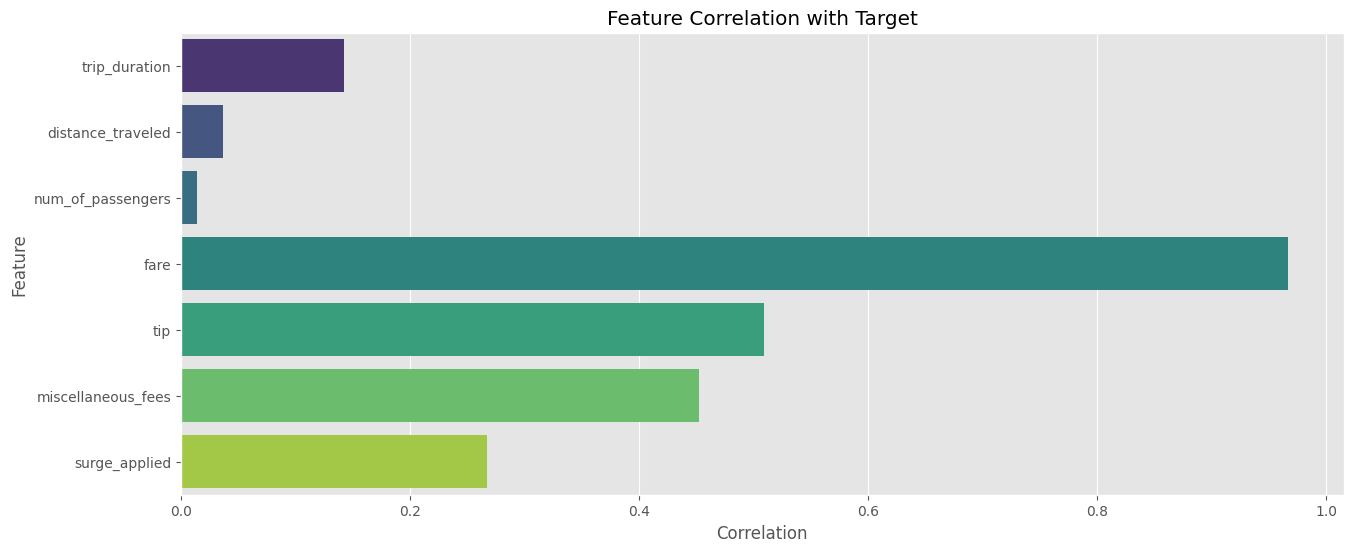

In [14]:
feat_corr = train.corr()["total_fare"]
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(x=feat_corr[:-1].values, y=feat_corr.index[:-1], ax=ax, palette="viridis")
ax.set_xlabel("Correlation")
ax.set_ylabel("Feature")
ax.set_title("Feature Correlation with Target")
plt.show()

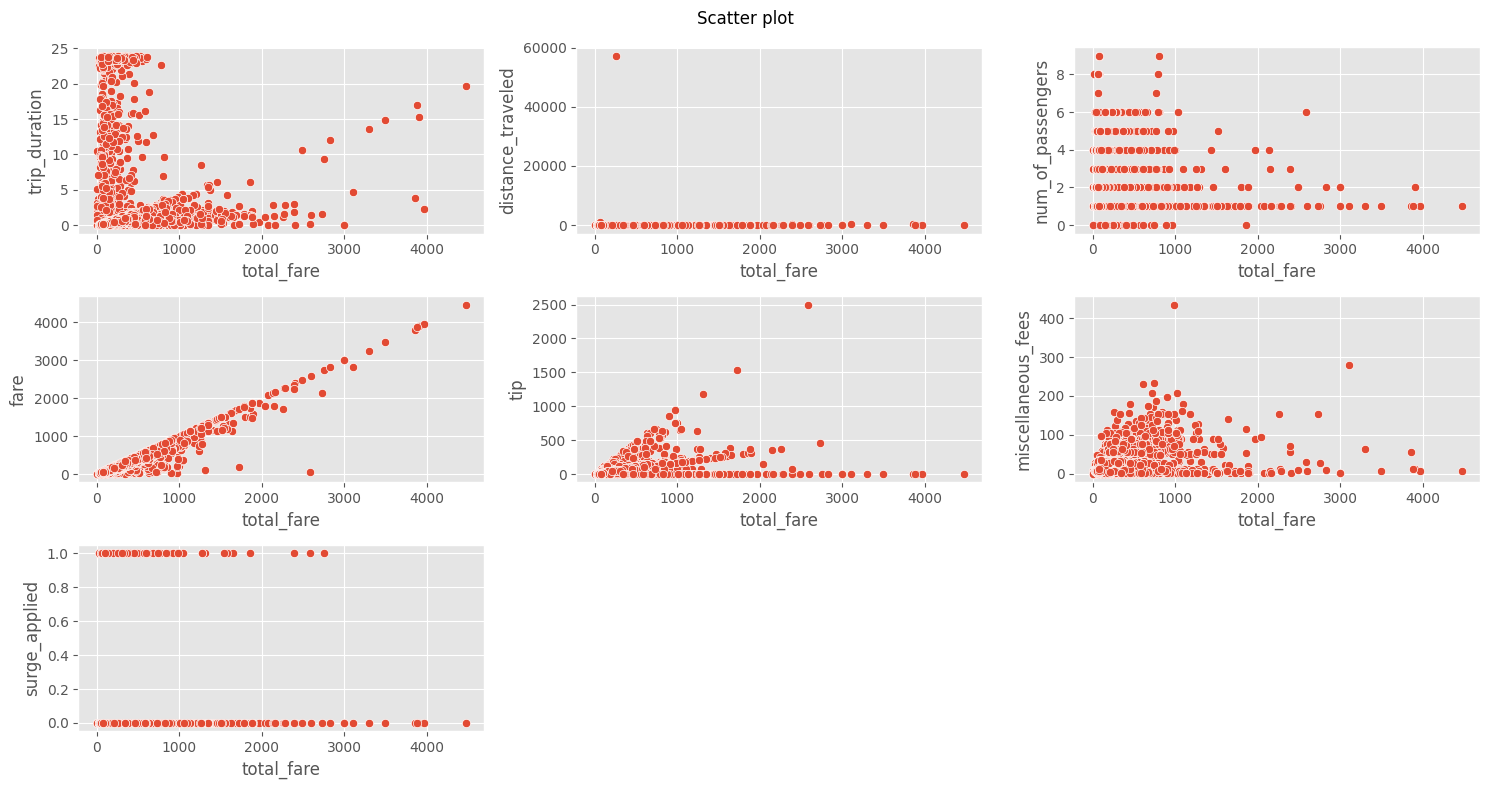

In [15]:
plt.figure(figsize=(15, 8))
for idx, col in enumerate(train.columns[:-1], start=1):
    plt.subplot(3, 3, idx)
    sns.scatterplot(data=train, x="total_fare", y=col)

plt.suptitle("Scatter plot")
plt.tight_layout()
plt.show()

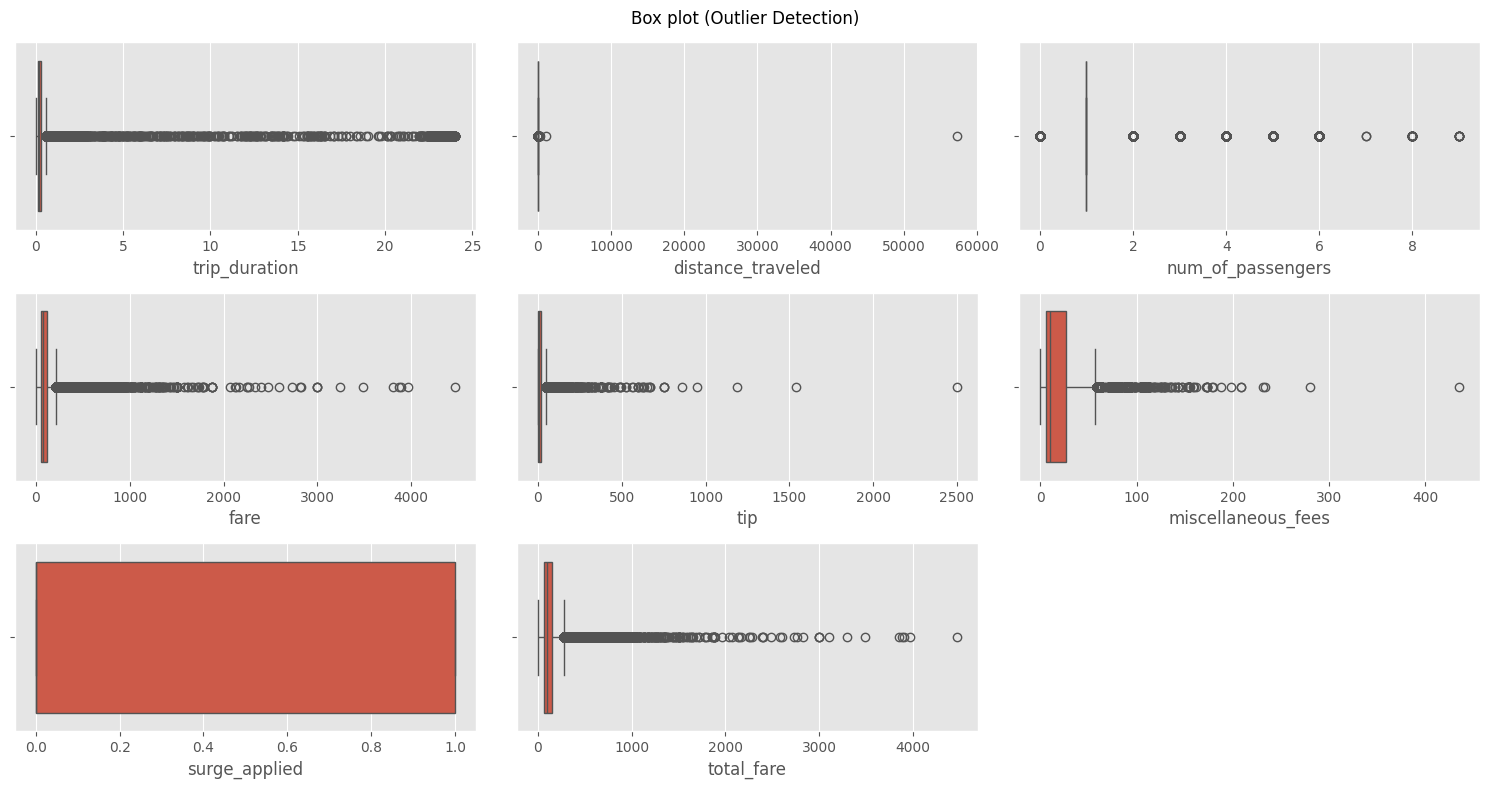

In [16]:
plt.figure(figsize=(15, 8))
for idx, col in enumerate(train.columns, start=1):
    plt.subplot(3, 3, idx)
    sns.boxplot(data=train, x=col)

plt.suptitle("Box plot (Outlier Detection)")
plt.tight_layout()
plt.show()

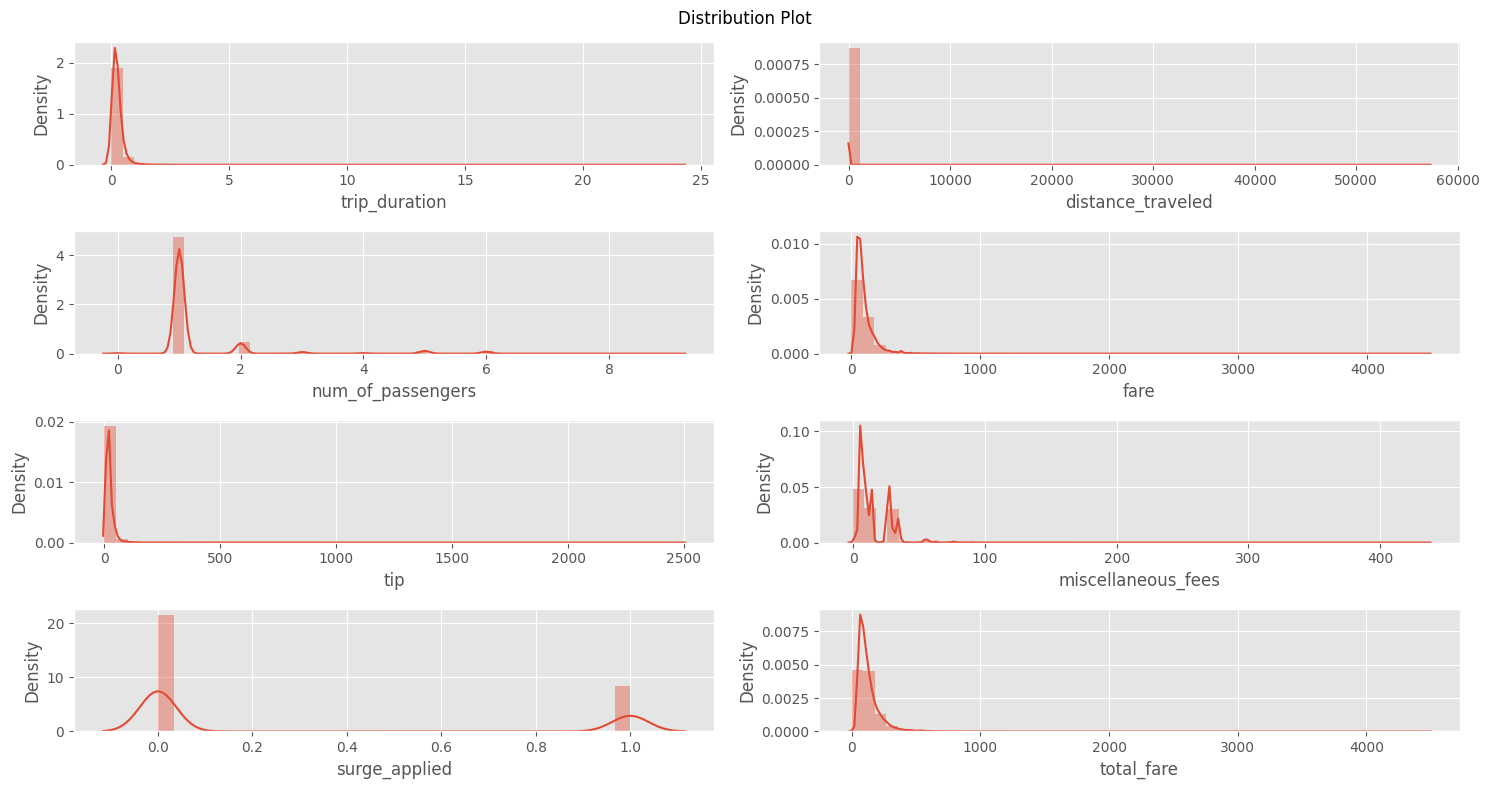

In [17]:
plt.figure(figsize=(15, 8))
for idx, col in enumerate(train.columns, start=1):
    plt.subplot(4, 2, idx)
    sns.distplot(train[col])

plt.suptitle("Distribution Plot")
plt.tight_layout()
plt.show()

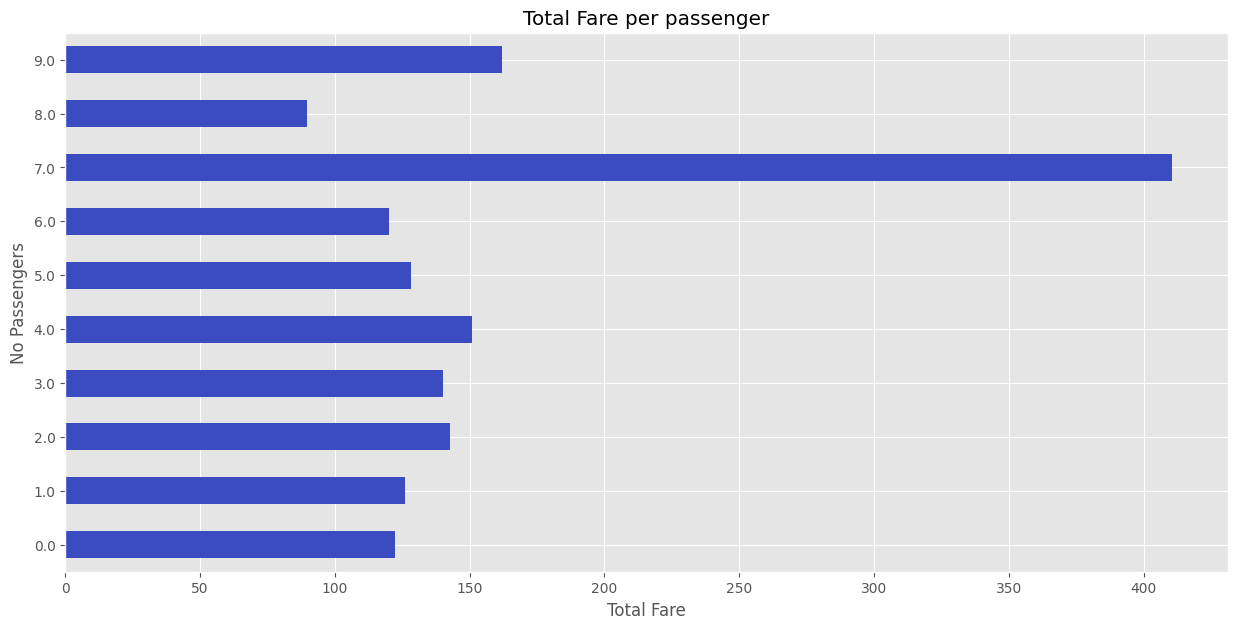

In [18]:
train.groupby("num_of_passengers").mean()["total_fare"].plot(kind="barh",
                                                             figsize=(15, 7),
                                                             xlabel="Total Fare",
                                                             ylabel="No Passengers",
                                                             cmap="coolwarm")
plt.title("Total Fare per passenger")
plt.show()

## Feature Enginering

In [19]:
train.drop(index=train[train["total_fare"] < 1].index, inplace=True)

In [20]:
total_data =  pd.concat([train, test], axis=0)

In [21]:
new_train = train.copy()
new_test = test.copy()

total_new_df = pd.concat([new_train, new_test])

total_new_df["speed_of_taxi"] = total_new_df["distance_traveled"] / total_new_df["trip_duration"]
total_new_df["num_of_passengers"] = total_new_df["num_of_passengers"].map(total_new_df["num_of_passengers"].value_counts()/total_new_df.shape[0])
total_new_df["surge_applied"] = total_new_df["surge_applied"].map(total_new_df["surge_applied"].value_counts()/total_new_df.shape[0])
total_new_df["fare_per_distance"] = total_new_df["fare"] / total_new_df["distance_traveled"]
total_new_df["tip_per_speed"] = total_new_df["tip"] / total_new_df["speed_of_taxi"]

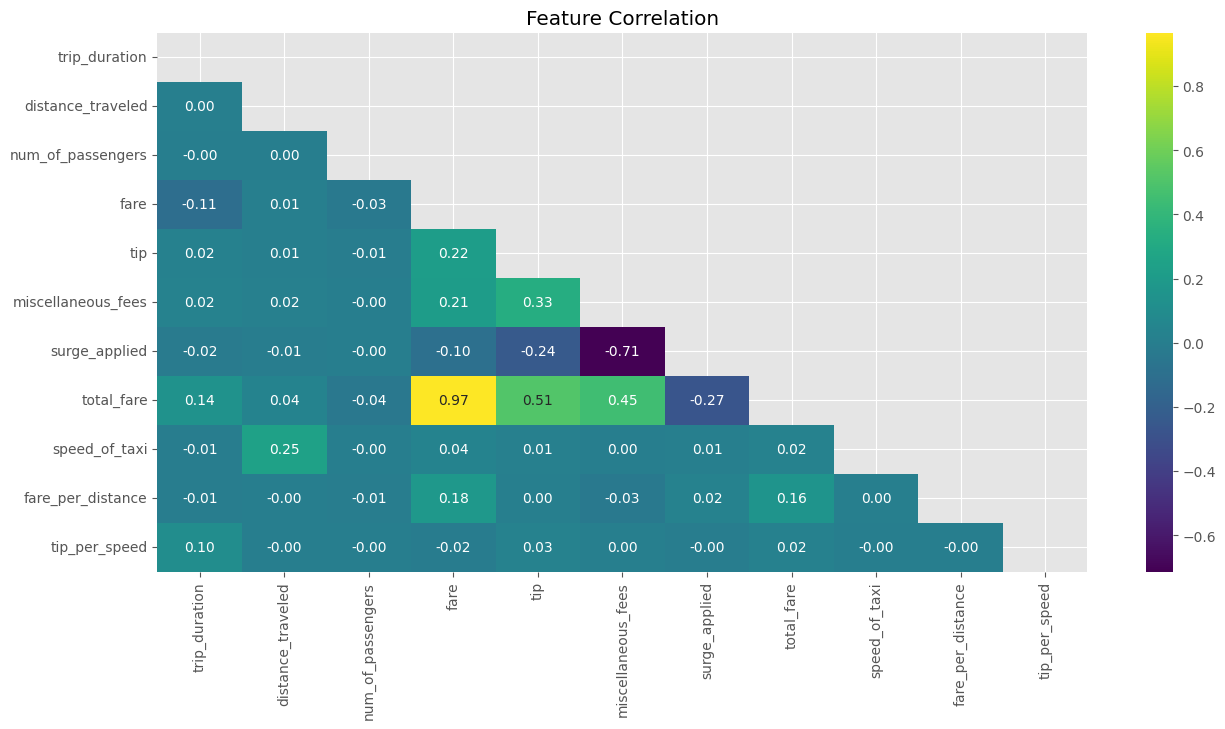

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(total_new_df.corr(), annot=True, fmt=".2f", cmap="viridis", mask=np.triu(np.ones_like(total_new_df.corr())))
plt.title("Feature Correlation")
plt.show()

In [23]:
train

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied,total_fare
0,0.207778,2.75,1.0,75.00,24,6.300,0,105.300
1,0.329722,3.43,1.0,105.00,24,13.200,0,142.200
2,0.202778,3.12,1.0,71.25,0,26.625,1,97.875
3,0.186389,5.63,3.0,90.00,0,9.750,0,99.750
4,0.091389,2.09,1.0,45.00,12,13.200,0,70.200
...,...,...,...,...,...,...,...,...
209668,0.449167,8.42,1.0,150.00,47,5.800,0,202.800
209669,0.121667,1.29,1.0,48.75,12,34.575,1,95.325
209670,0.158611,2.82,1.0,63.75,0,6.000,0,69.750
209671,0.136389,2.16,1.0,56.25,0,13.500,0,69.750


In [25]:
scaled_total_data = pd.DataFrame(StandardScaler().fit_transform(total_data.drop("total_fare", axis=1)), columns=total_data.drop("total_fare",axis=1).columns)

scaled_train = scaled_total_data[:train.shape[0]]

scaled_test = scaled_total_data[train.shape[0]:].reset_index(drop=True)

y = total_data["total_fare"][:train.shape[0]]

## Train Test Split

In [90]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train, y, test_size=.01, random_state=0)

In [91]:
X_train.shape

(207448, 7)

## Modelling

In [95]:
model = Sequential([
                    Dense(units=256, activation="relu", input_shape=(scaled_train.shape[1], ), kernel_regularizer=regularizers.L1L2()),
                    Dropout(0.1),
                    Dense(units=256, activation="relu", kernel_regularizer=regularizers.L1L2()),
                    Dropout(0.1),
                    Dense(units=128, activation="relu", kernel_regularizer=regularizers.L1L2()),
                    Dropout(0.1),
                    Dense(units=64, activation="relu", kernel_regularizer=regularizers.L1L2()),
                    Dropout(0.1),
                    Dense(units=32, activation="relu", kernel_regularizer=regularizers.L1L2()),
                    Dropout(0.1),
                    Dense(units=16, activation="relu", kernel_regularizer=regularizers.L1L2()),
                    Dropout(0.1),
                    Dense(1, activation="linear")
                    ])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_55 (Dense)            (None, 256)               2048      
                                                                 
 dropout_46 (Dropout)        (None, 256)               0         
                                                                 
 dense_56 (Dense)            (None, 256)               65792     
                                                                 
 dropout_47 (Dropout)        (None, 256)               0         
                                                                 
 dense_57 (Dense)            (None, 128)               32896     
                                                                 
 dropout_48 (Dropout)        (None, 128)               0         
                                                                 
 dense_58 (Dense)            (None, 64)               

In [96]:
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["MAE"])

In [97]:
history_1 = model.fit(X_train,
                      y_train,
                      validation_data=(X_test, y_test),
                      epochs=100,
                      callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=False)])

Epoch 1/100
6483/6483 [==============================] - 28s 4ms/step - loss: 1392.8335 - MAE: 18.9586 - val_loss: 585.0740 - val_MAE: 19.3786
Epoch 2/100
6483/6483 [==============================] - 22s 3ms/step - loss: 822.3992 - MAE: 15.8481 - val_loss: 905.5390 - val_MAE: 23.1805
Epoch 3/100
6483/6483 [==============================] - 21s 3ms/step - loss: 694.8137 - MAE: 14.7298 - val_loss: 824.8583 - val_MAE: 22.4562
Epoch 4/100
6483/6483 [==============================] - 22s 3ms/step - loss: 628.8439 - MAE: 14.2455 - val_loss: 1065.9236 - val_MAE: 25.5451
Epoch 5/100
6483/6483 [==============================] - 23s 3ms/step - loss: 774.5065 - MAE: 13.9934 - val_loss: 750.7275 - val_MAE: 22.1008
Epoch 6/100
6483/6483 [==============================] - 22s 3ms/step - loss: 608.7584 - MAE: 13.2902 - val_loss: 1142.8022 - val_MAE: 26.1446
Epoch 7/100
6483/6483 [==============================] - 22s 3ms/step - loss: 549.6182 - MAE: 13.0403 - val_loss: 1194.7317 - val_MAE: 26.4321
Ep

In [98]:
loss, rmse = model.evaluate(X_test, y_test)

print(f"Loss: {loss}\nRMSE: {rmse}")

66/66 [==============================] - 0s 1ms/step - loss: 1165.4509 - MAE: 24.5837
Loss: 1165.450927734375
RMSE: 24.583707809448242


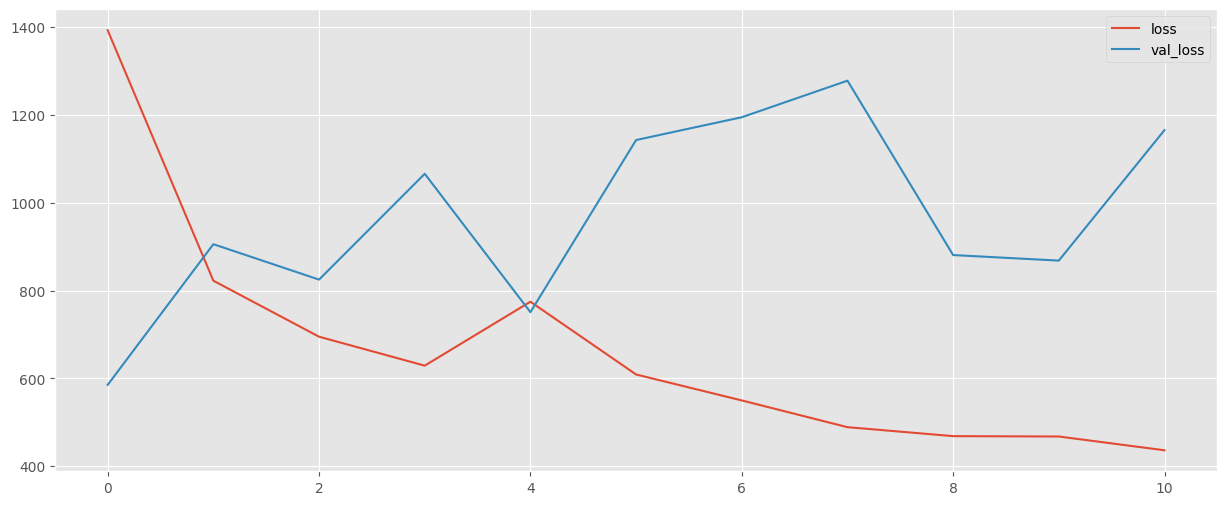

In [99]:
pd.DataFrame(history_1.history)[["loss", "val_loss"]].plot(figsize=(15, 6))
plt.show()

In [100]:
total_new_df

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied,total_fare,speed_of_taxi,fare_per_distance,tip_per_speed
0,0.207778,2.75,0.855016,75.00,24,6.300,0.718829,105.300,13.235294,27.272727,1.813333
1,0.329722,3.43,0.855016,105.00,24,13.200,0.718829,142.200,10.402696,30.612245,2.307094
2,0.202778,3.12,0.855016,71.25,0,26.625,0.281171,97.875,15.386301,22.836538,0.000000
3,0.186389,5.63,0.013096,90.00,0,9.750,0.718829,99.750,30.205663,15.985790,0.000000
4,0.091389,2.09,0.855016,45.00,12,13.200,0.718829,70.200,22.869301,21.531100,0.524721
...,...,...,...,...,...,...,...,...,...,...,...
89856,435.000000,2.24,0.855016,0.00,13,13.700,0.718829,NaN,0.005149,0.000000,2524.553571
89857,519.000000,2.61,0.855016,0.00,7,13.850,0.718829,NaN,0.005029,0.000000,1391.954023
89858,450.000000,2.24,0.855016,0.00,0,26.625,0.281171,NaN,0.004978,0.000000,0.000000
89859,919.000000,4.12,0.855016,0.00,25,30.200,0.281171,NaN,0.004483,0.000000,5576.456311


In [101]:
scaled_total_new_df = total_new_df.drop("total_fare", axis=1).apply(stats.zscore).drop("speed_of_taxi", axis=1)

scaled_train_new = scaled_total_new_df[:train.shape[0]]

scaled_test_new = scaled_total_new_df[train.shape[0]:].reset_index(drop=True)

In [102]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(scaled_train_new, y, test_size=.1, random_state=0)

In [103]:
model_new = Sequential([
                        Dense(units=256, activation="relu", input_shape=(scaled_train_new.shape[1], ), kernel_regularizer=regularizers.L1L2()),
                        Dropout(0.1),
                        Dense(units=256, activation="relu", kernel_regularizer=regularizers.L1L2()),
                        Dropout(0.1),
                        Dense(units=128, activation="relu", kernel_regularizer=regularizers.L1L2()),
                        Dropout(0.1),
                        Dense(units=64, activation="relu", kernel_regularizer=regularizers.L1L2()),
                        Dropout(0.1),
                        Dense(units=32, activation="relu", kernel_regularizer=regularizers.L1L2()),
                        Dropout(0.1),
                        Dense(units=16, activation="relu", kernel_regularizer=regularizers.L1L2()),
                        Dropout(0.1),
                        Dense(1, activation="linear")
                    ])

model_new.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            (None, 256)               2560      
                                                                 
 dropout_52 (Dropout)        (None, 256)               0         
                                                                 
 dense_63 (Dense)            (None, 256)               65792     
                                                                 
 dropout_53 (Dropout)        (None, 256)               0         
                                                                 
 dense_64 (Dense)            (None, 128)               32896     
                                                                 
 dropout_54 (Dropout)        (None, 128)               0         
                                                                 
 dense_65 (Dense)            (None, 64)              

In [104]:
model_new.compile(optimizer="rmsprop",
                  loss="mean_squared_error",
                  metrics=["MAE"])

In [105]:
history_2 = model_new.fit(X_train_new,
                          y_train_new,
                          validation_data=(X_test_new, y_test_new),
                          epochs=100,
                          callbacks=[callbacks.EarlyStopping(patience=10, restore_best_weights=False)])

Epoch 1/100
5894/5894 [==============================] - 24s 4ms/step - loss: 1263.8260 - MAE: 17.1881 - val_loss: 843.3546 - val_MAE: 22.8362
Epoch 2/100
5894/5894 [==============================] - 24s 4ms/step - loss: 896.4332 - MAE: 14.2757 - val_loss: 650.3207 - val_MAE: 19.5632
Epoch 3/100
5894/5894 [==============================] - 24s 4ms/step - loss: 1241.2848 - MAE: 13.2470 - val_loss: 954.4597 - val_MAE: 21.0541
Epoch 4/100
5894/5894 [==============================] - 20s 3ms/step - loss: 699.0751 - MAE: 12.5073 - val_loss: 2347.0967 - val_MAE: 34.9176
Epoch 5/100
5894/5894 [==============================] - 22s 4ms/step - loss: 498.7193 - MAE: 12.0891 - val_loss: 926.0385 - val_MAE: 22.3174
Epoch 6/100
5894/5894 [==============================] - 22s 4ms/step - loss: 424.3409 - MAE: 11.7511 - val_loss: 688.0630 - val_MAE: 19.5525
Epoch 7/100
5894/5894 [==============================] - 19s 3ms/step - loss: 387.8379 - MAE: 11.3161 - val_loss: 834.6105 - val_MAE: 21.9055
Epo

In [106]:
loss, rmse = model_new.evaluate(X_test_new, y_test_new)

print(f"Loss: {loss}\nRMSE: {rmse}")

655/655 [==============================] - 1s 2ms/step - loss: 1077.2878 - MAE: 21.5015
Loss: 1077.287841796875
RMSE: 21.501489639282227


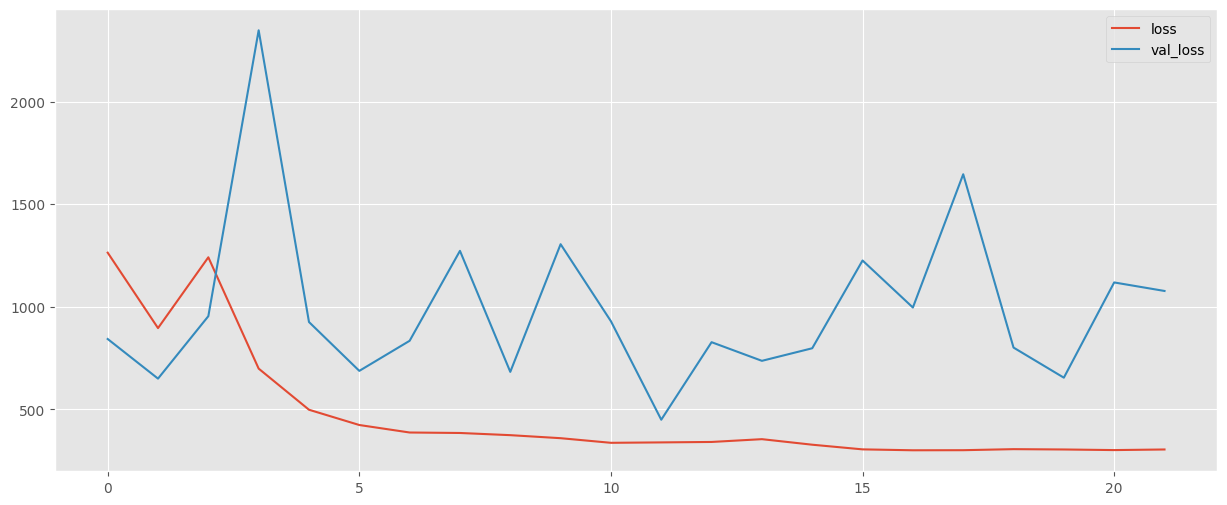

In [109]:
pd.DataFrame(history_2.history)[["loss", "val_loss"]].plot(figsize=(15, 6))
plt.show()

#### In this project, tensorflow didn't perform very well on validation dataset. I would explore other techniques as i progress.


## EDDY